# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [7]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [8]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: This data set has a total of 400 rows, but two cells in the gre and gpa columns are empty, while one cell in the prestige column is empty.

#### Question 2. Create a summary table

In [9]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [5]:
df_raw.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Grade point average (GPA) by definition is an averaged value.  It is calculated by dividing the total amount of grade points earned by the total amount of credit hours attempted. GRE is a total sum of different component of a test.  Qualitatively, GRE's standard deviation (STD) should thus be higher in absolute terms than GPA.  

Quantitatively, GRE's STD is higher since the min and max values, AND the mean value are higher than the min and max values and the mean value of GPA.

#### Question 4. Drop data points with missing data


In [37]:
df_new = df_raw[df_raw.gre.isnull()]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0


In [39]:
#removing the rows, where gre is NaN
df_new = df_raw[df_raw.gre.notnull()]

In [43]:
#removing the rows, where prestige is NaN
df_new = df_new[df_new.prestige.notnull()]

In [44]:
df_new.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [47]:
df_new[df_new.admit.isnull()]

,admit,gre,gpa,prestige


In [49]:
df_new[df_new.gpa.isnull()]

,admit,gre,gpa,prestige


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: I can tell because my new dataset stored in df_new has the same number of rows for all variables - gre, gpa, prestige and admin.  We can verify this by using df_new.count().  To be sure, I also checked that in the df_new dataset, none of the columns are empty, using the isnull() function

#### Question 6. Create box plots for GRE and GPA

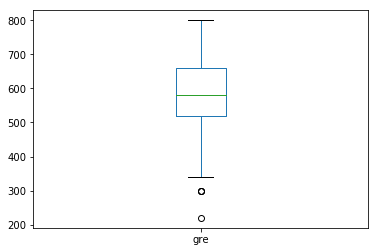

In [50]:
#box plot for gre
df_new["gre"].plot(kind="box")# TODO

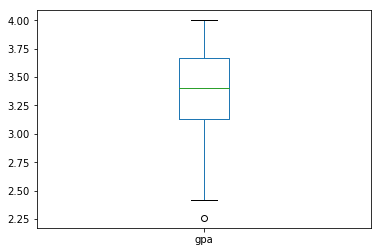

In [52]:
#boxplot for gpa
df_new["gpa"].plot(kind="box")# TODO

#### Question 7. What do this plots show?

Answer: The plots show the min and max values (the black line), the interquartile variation (the limits of the blue box), and the median (the green line). The white dots are the outliers

#### Question 8. Describe each distribution 

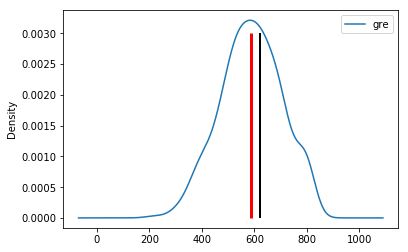

In [73]:
# plot the distribution of each variable 
df_new[["gre"]].plot(kind="density")
plt.vlines(df_new.gre.mode(),     # Plot black line at mode
           ymin=0, 
           ymax=0.003,
           linewidth=2.0)
plt.vlines(df_new.gre.mean(),     # Plot red line at mean
           ymin=0, 
           ymax=0.003,
           linewidth=3.0,
          color="red")

In [67]:
###The gre values have an almost normal distribution. The mean and the media almost matches, btut the mode does not

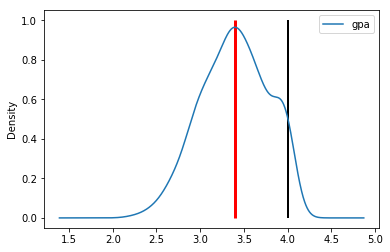

In [74]:
df_new[["gpa"]].plot(kind="density")
plt.vlines(df_new.gpa.mode(),     # Plot black line at mode
           ymin=0, 
           ymax=1.0,
           linewidth=2.0)
plt.vlines(df_new.gpa.mean(),     # Plot red line at mean
           ymin=0, 
           ymax=1.0,
           linewidth=3.0,
          color="red")

In [ ]:
##gpa values also have an almost normal distribution, but it is not totally a normal distribution since the mode does not match with the mean and median

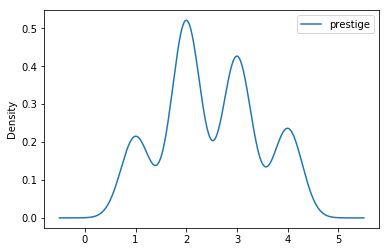

In [58]:
df_new[["prestige"]].plot(kind="density")

In [ ]:
The prestige and admit distribution has multiple peaks

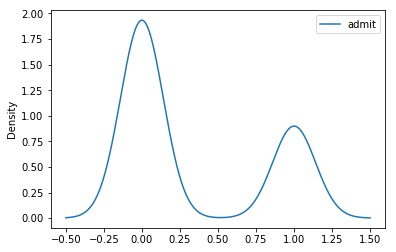

In [59]:
df_new[["admit"]].plot(kind="density")

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: NO. For the gre and gpa values, the mean, mode and median do not match

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: NO

#### Question 11. Which of our variables are potentially colinear? 

In [75]:
# create a correlation matrix for the data
df_new.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: There is a highest degree of correlation between gre and gpa.  There is a negative relation between admission and prestige

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Since my prestige variables are ordinal variables (1,2,3,4), I will have to create dummy variables for prestige to be able to find out the association between grad school admissions rate and prestige

After creating the dummy variables, I will use the logistic regression model, with admit as my outcome variable, and prestige as my predictor.  

#### Question 14. What is your hypothesis? 

Answer: Null hypothesis : There is no relationship between the prestige of a student's undergraduate school and his or her rate of admission into graduate school

Alternate hypothesis: Students from more prestigious undergraduate schools will have higher admissions rates into graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [ ]:
I can replace all the missing values by first creating a relation between the existing values of gre and gpa.  With the straight line equation, I can then find the expected values of the gre and gpa for those cells that were originally empty

#### 2. Bonus: Log transform the skewed data

In [85]:
dummy_ranks = pd.get_dummies(df_new['prestige'], prefix='prestige')

cols_to_keep = ['admit', 'gre', 'gpa']
df_Wdummy = df_new[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

df_Wdummy['intercept'] = 1.0

train_cols = df_Wdummy.columns[1:]
logit = sm.Logit(df_Wdummy['admit'], df_Wdummy[train_cols])


# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 3. Advanced: Impute missing data